In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (5).zip to archive (5).zip


In [2]:
import zipfile
import os

zip_filename = "archive (5).zip"
extract_to = "/content/my_folder"


with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Unzipped to: {extract_to}")


Unzipped to: /content/my_folder


In [3]:
from pathlib import Path
from collections import defaultdict

base_path = Path("/content/my_folder")

# Store image paths by emotion"
emotion_split_paths = defaultdict(list)
for split in ["train", "test"]:
    for emotion_dir in (base_path / split).iterdir():
        if emotion_dir.is_dir():
            for img in emotion_dir.glob("*.png"):
                emotion_split_paths[f"{split}/{emotion_dir.name}"].append(img)


In [4]:
import shutil
from pathlib import Path

# Start from the original dataset
source_path = Path("/content/my_folder")


# Create filtered version (happy vs not_happy)
filtered_base = Path("/mnt/data/binary_filtered_dataset_v2/images")
(happy_dir := filtered_base / "happy").mkdir(parents=True, exist_ok=True)
(not_happy_dir := filtered_base / "not_happy").mkdir(parents=True, exist_ok=True)

# Define what to include
happy_classes = ["Happy"]
not_happy_classes = ["Disgust", "Sad"]

# Copy images
for split in ["train", "test"]:
    for emotion in happy_classes:
        for img in (source_path / split / emotion).glob("*.png"):
            shutil.copy(img, happy_dir / img.name)
    for emotion in not_happy_classes:
        for img in (source_path / split / emotion).glob("*.png"):
            shutil.copy(img, not_happy_dir / img.name)



Showing GRAYSCALE HAPPY images:
happy image 1: (48, 48)
happy image 2: (48, 48)
happy image 3: (48, 48)
happy image 4: (48, 48)
happy image 5: (48, 48)


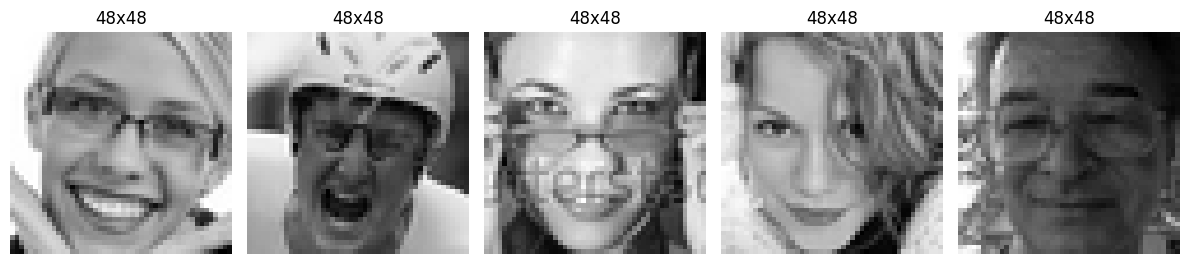


Showing GRAYSCALE NOT_HAPPY images:
not_happy image 1: (48, 48)
not_happy image 2: (48, 48)
not_happy image 3: (48, 48)
not_happy image 4: (48, 48)
not_happy image 5: (48, 48)


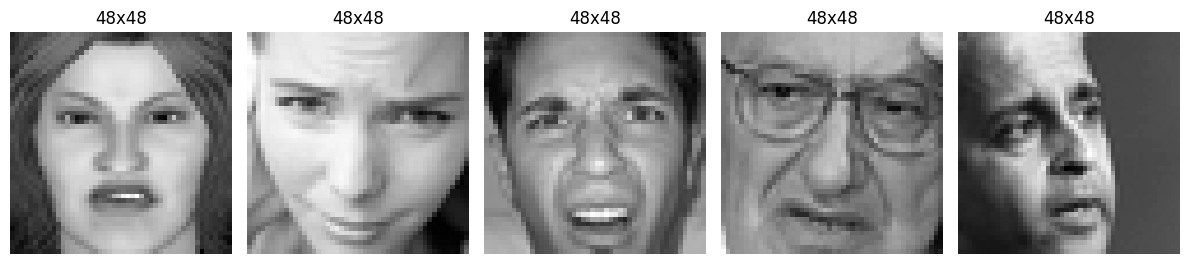

In [5]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Define folders
happy_path = "/mnt/data/binary_filtered_dataset_v2/images/happy"
not_happy_path = "/mnt/data/binary_filtered_dataset_v2/images/not_happy"

# Sample image filenames
happy_images = random.sample(os.listdir(happy_path), 5)
not_happy_images = random.sample(os.listdir(not_happy_path), 5)

# Function to display grayscale images and print their shape
def show_grayscale_images(img_list, label, folder):
    print(f"\nShowing GRAYSCALE {label.upper()} images:")
    plt.figure(figsize=(12, 3))
    for i, img_name in enumerate(img_list):
        img_path = os.path.join(folder, img_name)
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        print(f"{label} image {i+1}: {img_gray.shape}")  # (height, width)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img_gray, cmap='gray')
        plt.title(f"{img_gray.shape[0]}x{img_gray.shape[1]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show grayscale images
show_grayscale_images(happy_images, "happy", happy_path)
show_grayscale_images(not_happy_images, "not_happy", not_happy_path)



In [6]:
# Define paths
happy_path = "/mnt/data/binary_filtered_dataset_v2/images/happy"
not_happy_path = "/mnt/data/binary_filtered_dataset_v2/images/not_happy"

# Count number of .png files
happy_count = len([f for f in os.listdir(happy_path) if f.endswith(".png")])
not_happy_count = len([f for f in os.listdir(not_happy_path) if f.endswith(".png")])

print(f"Number of Happy images: {happy_count}")
print(f"Number of Not Happy images: {not_happy_count}")


Number of Happy images: 8094
Number of Not Happy images: 5915


# Balancing the dataset

In [7]:
# Define input paths
happy_dir = Path("/mnt/data/binary_filtered_dataset_v2/images/happy")
not_happy_dir = Path("/mnt/data/binary_filtered_dataset_v2/images/not_happy")

# Define output path
balanced_base = Path("/mnt/data/binary_filtered_balanced_v2/images")
(happy_out := balanced_base / "happy").mkdir(parents=True, exist_ok=True)
(not_happy_out := balanced_base / "not_happy").mkdir(parents=True, exist_ok=True)

# Get image paths
happy_images = list(happy_dir.glob("*.png"))
not_happy_images = list(not_happy_dir.glob("*.png"))

# Balance: sample same number of Not Happy as Happy
random.seed(42)
# Sample the larger class (Happy) to match the size of the smaller class (Not Happy)
happy_sample = random.sample(happy_images, len(not_happy_images))

# Clear output dirs if needed
for f in happy_out.glob("*"): f.unlink()
for f in not_happy_out.glob("*"): f.unlink()

# Copy files to balanced folders
for img in happy_sample:
    shutil.copy(img, happy_out / img.name)
for img in not_happy_images:
    shutil.copy(img, not_happy_out / img.name)

print(f"Balanced dataset created with {len(not_happy_images)} images per class.")

Balanced dataset created with 5915 images per class.


not_happy_sample = random.sample(not_happy_images, len(happy_images))
downsamples the dataset by rendom pick of 8,904 images out of 11k

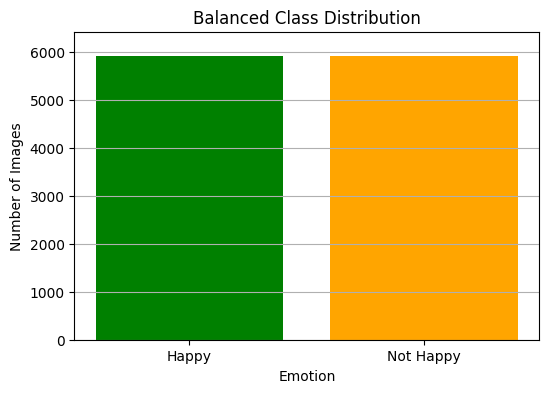

In [8]:
import matplotlib.pyplot as plt

# Class counts
class_names = ['Happy', 'Not Happy']

# Define output path from the previous cell where balanced dataset was created
balanced_base = Path("/mnt/data/binary_filtered_balanced_v2/images")
happy_out = balanced_base / "happy"
not_happy_out = balanced_base / "not_happy"

# Count the number of images in the balanced directories
image_counts = [len(list(happy_out.glob("*.png"))), len(list(not_happy_out.glob("*.png")))]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(class_names, image_counts, color=['green', 'orange'])
plt.title("Balanced Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.ylim(0, max(image_counts) + 500)
plt.grid(axis='y')
plt.show()

In [9]:


# Paths to balanced dataset
happy_path = "/mnt/data/binary_filtered_balanced_v2/images/happy"
not_happy_path = "/mnt/data/binary_filtered_balanced_v2/images/not_happy"

# Count only .png files
happy_count = len([f for f in os.listdir(happy_path) if f.endswith(".png")])
not_happy_count = len([f for f in os.listdir(not_happy_path) if f.endswith(".png")])

print(f"Number of Happy images: {happy_count}")
print(f"Number of Not Happy images: {not_happy_count}")


Number of Happy images: 5915
Number of Not Happy images: 5915


# Modelling

In [12]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === Paths and DataFrame ===
base_path = Path("/mnt/data/binary_filtered_balanced_v2/images")
happy_paths = list((base_path / "happy").glob("*.png"))
not_happy_paths = list((base_path / "not_happy").glob("*.png"))

df = pd.DataFrame({
    "path": happy_paths + not_happy_paths,
    "label": [1]*len(happy_paths) + [0]*len(not_happy_paths)
}).sample(frac=1, random_state=42).reset_index(drop=True)

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df["path"] = train_df["path"].astype(str)
val_df["path"] = val_df["path"].astype(str)
train_df["label"] = train_df["label"].astype(str)
val_df["label"] = val_df["label"].astype(str)

# === Image Generators with Augmentation ===
IMG_SIZE = (48, 48)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

# === CNN Model ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Early Stopping Callback ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# === Train Model ===
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,  # More epochs since early stopping is active
    callbacks=[early_stop]
)


Found 9464 validated image filenames belonging to 2 classes.
Found 2366 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5177 - loss: 0.6923

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5179 - loss: 0.6923 - val_accuracy: 0.6124 - val_loss: 0.6636
Epoch 2/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.6033 - loss: 0.6652 - val_accuracy: 0.6221 - val_loss: 0.6683
Epoch 3/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6480 - loss: 0.6282 - val_accuracy: 0.7527 - val_loss: 0.5075
Epoch 4/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.6999 - loss: 0.5701 - val_accuracy: 0.8039 - val_loss: 0.4207
Epoch 5/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7687 - loss: 0.4857 - val_accuracy: 0.8009 - val_loss: 0.4445
Epoch 6/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7960 - loss: 0.4374 - val_accuracy: 0.8352 - val_loss: 0.3612
Epoch 7/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8093 - loss: 0.4166 - val_accuracy: 0.8550 - val_loss: 0.3282
Epoch 8/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8230 - loss: 0.3972 - val_accurac

In [10]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === Paths and DataFrame ===
base_path = Path("/mnt/data/binary_filtered_balanced_v2/images")
happy_paths = list((base_path / "happy").glob("*.png"))
not_happy_paths = list((base_path / "not_happy").glob("*.png"))

df = pd.DataFrame({
    "path": happy_paths + not_happy_paths,
    "label": [1]*len(happy_paths) + [0]*len(not_happy_paths)
}).sample(frac=1, random_state=42).reset_index(drop=True)

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df["path"] = train_df["path"].astype(str)
val_df["path"] = val_df["path"].astype(str)
train_df["label"] = train_df["label"].astype(str)
val_df["label"] = val_df["label"].astype(str)

# === Image Generators with Augmentation ===
IMG_SIZE = (48, 48)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

# === Improved CNN Model with BatchNormalization ===
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")

# === Train Model ===
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

# === Save Final Model ===
model.save("final_emotion_model.h5")


Found 9464 validated image filenames belonging to 2 classes.
Found 2366 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5748 - loss: 0.8915

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.5749 - loss: 0.8910 - val_accuracy: 0.6314 - val_loss: 0.6476
Epoch 2/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6709 - loss: 0.6059

296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.6710 - loss: 0.6057 - val_accuracy: 0.6855 - val_loss: 0.5534
Epoch 3/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7608 - loss: 0.5014

296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.7608 - loss: 0.5013 - val_accuracy: 0.7908 - val_loss: 0.4535
Epoch 4/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.7852 - loss: 0.4481 - val_accuracy: 0.5478 - val_loss: 0.8827
Epoch 5/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.8138 - loss: 0.4137 - val_accuracy: 0.7413 - val_loss: 0.5199
Epoch 6/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8236 - loss: 0.3911

296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8236 - loss: 0.3911 - val_accuracy: 0.7954 - val_loss: 0.4335
Epoch 7/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8305 - loss: 0.3732 - val_accuracy: 0.7836 - val_loss: 0.4390
Epoch 8/20
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8458 - loss: 0.3631

296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8459 - loss: 0.3631 - val_accuracy: 0.8601 - val_loss: 0.3149
Epoch 9/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8532 - loss: 0.3304 - val_accuracy: 0.6128 - val_loss: 0.9388
Epoch 10/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8535 - loss: 0.3363 - val_accuracy: 0.8478 - val_loss: 0.3669
Epoch 11/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8667 - loss: 0.3206 - val_accuracy: 0.7798 - val_loss: 0.4455


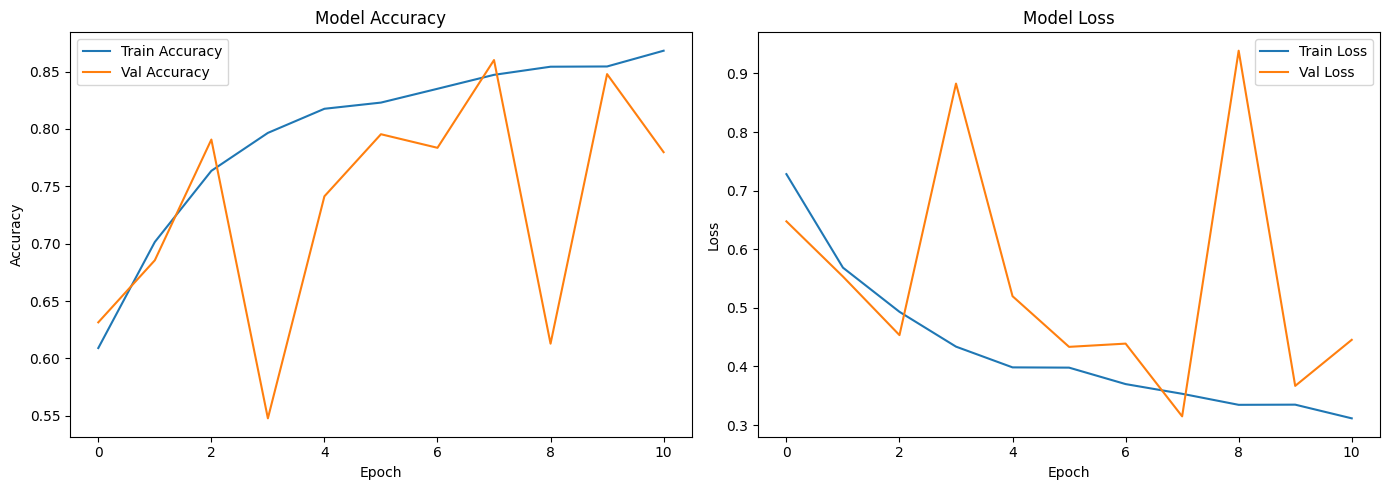

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
model = load_model("/content/final_emotion_model.h5")

# Prepare test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_dataframe(
    val_df,  # Use real test_df if available
    x_col="path",
    y_col="label",
    target_size=(48, 48),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Predict
y_pred_prob = model.predict(test_gen)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_gen.classes


Found 2366 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [14]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy * 100:.2f}%)")


✅ Test Accuracy: 0.8601 (86.01%)


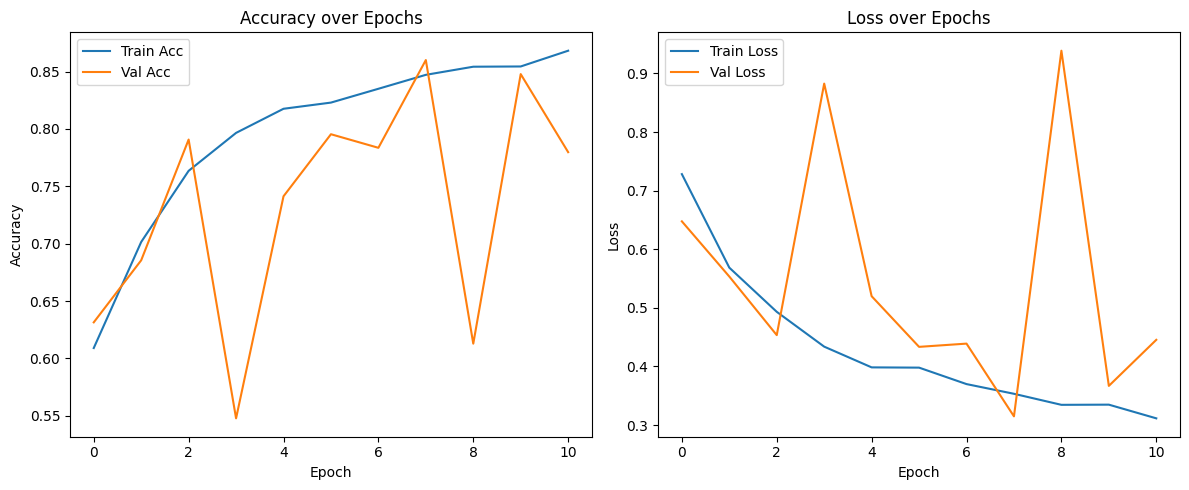

In [13]:
# Plot Accuracy & Loss
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_curves(history)  # <- only works if you still have `history` object in memory


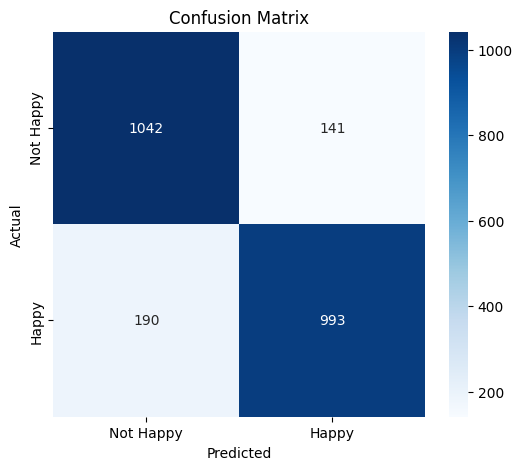

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Happy', 'Happy'], yticklabels=['Not Happy', 'Happy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


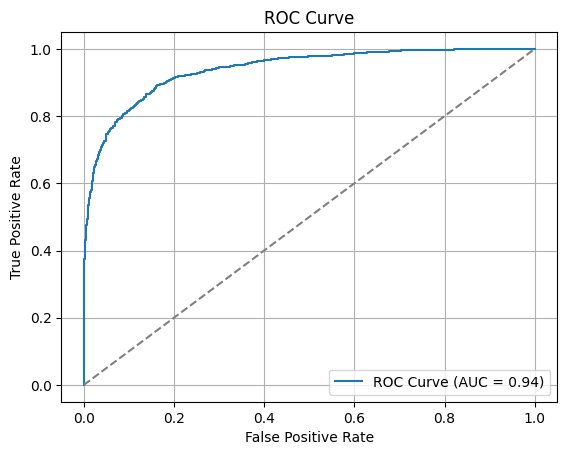

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = roc_auc_score(y_true, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


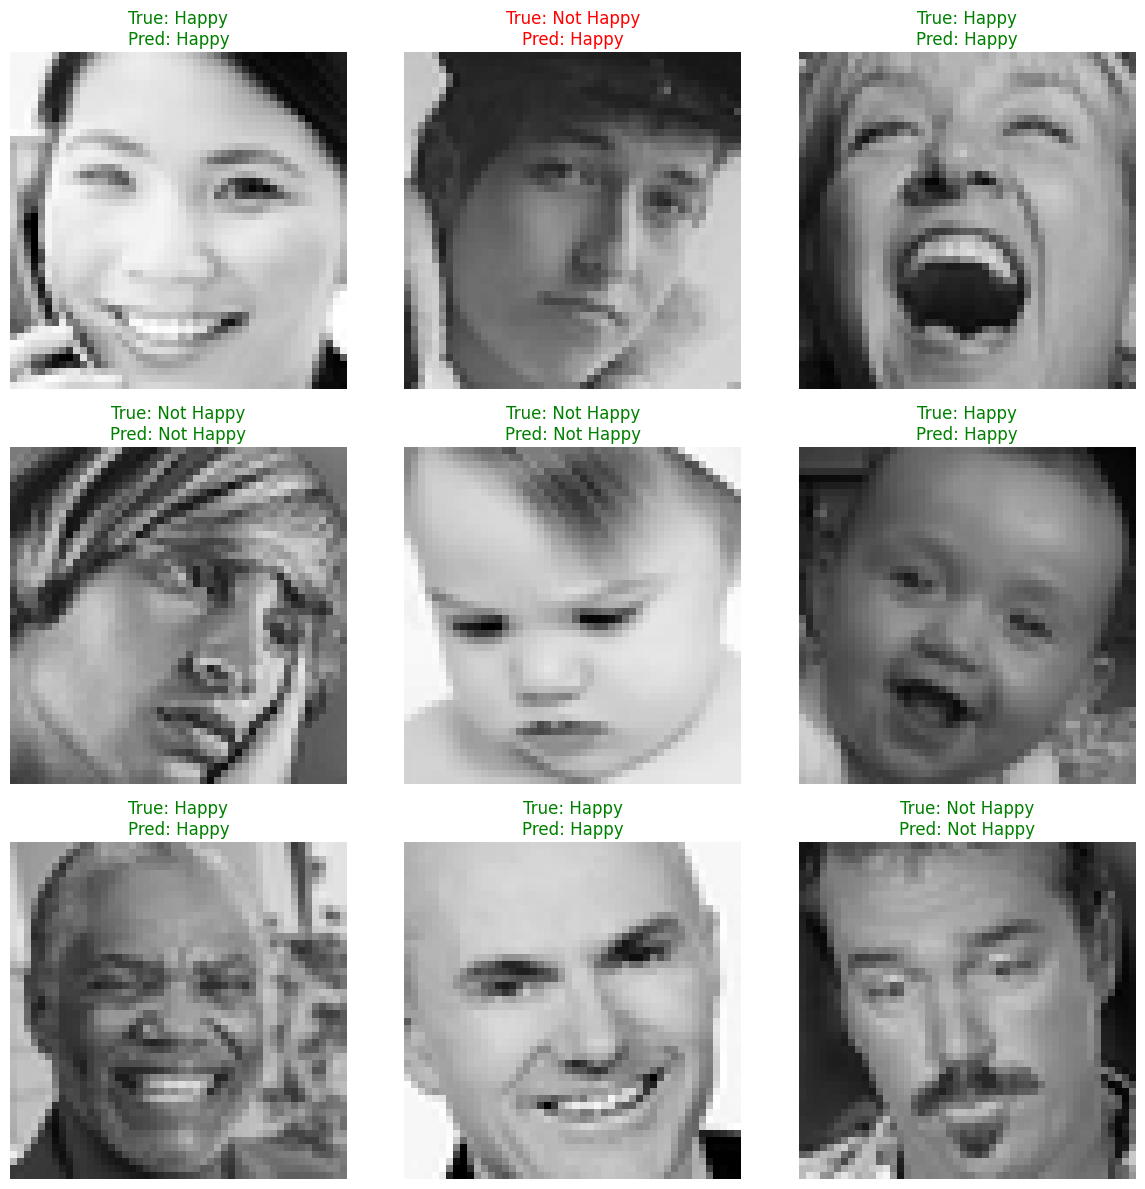

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Get image batch from the test generator
images, labels = next(test_gen)

# Predict on the batch
preds = model.predict(images)
pred_labels = (preds > 0.5).astype(int).flatten()

# Class label names
class_names = ['Not Happy', 'Happy']

# Plot first 9 predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    true_label = class_names[int(labels[i])]
    predicted_label = class_names[int(pred_labels[i])]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


Prediction Function (for single image or webcam)

In [27]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

# Load your model
model = load_model("final_emotion_model.h5")
CLASS_NAMES = ["Not Happy", "Happy"]

# Define prediction function
def predict_image_pil(pil_img):
    img = pil_img.resize((48, 48)).convert("RGB")
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prob = model.predict(img_array)[0][0]
    label = "Happy" if prob > 0.5 else "Not Happy"
    confidence = prob if prob > 0.5 else 1 - prob
    return f"{label} ({confidence:.2%})"

# Define Gradio interface
iface = gr.Interface(
    fn=predict_image_pil,
    inputs=gr.Image(type="pil", label="Upload a Face Image"),
    outputs="text",
    title="Facial Emotion Detector",
    description="This model classifies if a person is Happy or Not Happy from a color image."
)

iface.launch(share=True)  # 'share=True' gives you the public hyperlink


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec59832ee14236e685.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
